# **ASSIGNMENT 3: Predictive Analysis on wrangled data**



The **aim of this assignment** is to perform **predictive analysis** on various datasets that have been collected from different sources. The exercise will focus on building predictive models to forecast future outcomes, trends, or behavior based on historical data. This assignment will provide hands-on experience in preparing data for predictive analysis, choosing the right models, evaluating their performance, and deriving actionable insights.

##  Predictive Tasks:




## ***Temperature Forecasting:***

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

This code imports essential libraries for **data analysis, visualization, machine learning, and evaluation**.

* pandas is used for data manipulation, while matplotlib.pyplot facilitates data visualization.

* train_test_split splits data into training and testing sets.

* The models, LinearRegression and RandomForestRegressor, are utilized for regression tasks.

* Finally, the code calculates model performance using mean_squared_error and leverages numpy for numerical operations.

In [ ]:
file_path = "/content/kolkata_weather_data.csv"
df = pd.read_csv(file_path)


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

This above code converts **the datetime column in the dataframe df to a datetime format**. It then extracts and adds new columns for the year, month, and day from the datetime values.

In [ ]:
df = df[['datetime', 'temp', 'year', 'month', 'day']]

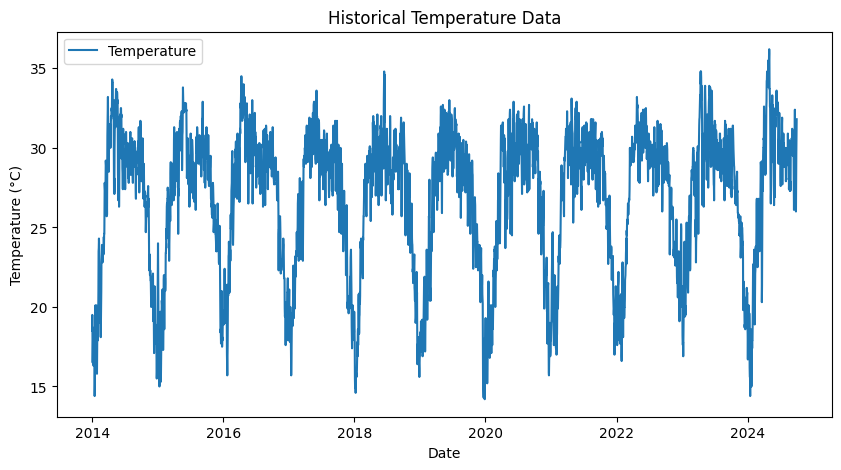

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['temp'], label="Temperature")
plt.title("Historical Temperature Data")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

The above plot depicts **historical temperature data over time**.

The x-axis represents the date, ranging from 2014 to 2024, while the y-axis shows temperature in degrees Celsius.

**A consistent seasonal pattern of temperature fluctuation is observed across the years**.

In [ ]:
X = df[['year', 'month', 'day']]
y = df['temp']

In [ ]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a regression model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.1539559979880603


The **Root Mean Squared Error (RMSE)** of 1.15 indicates the average difference between the predicted and actual values is approximately 1.15 units.

 It measures the model's prediction accuracy, with lower values signifying better performance.

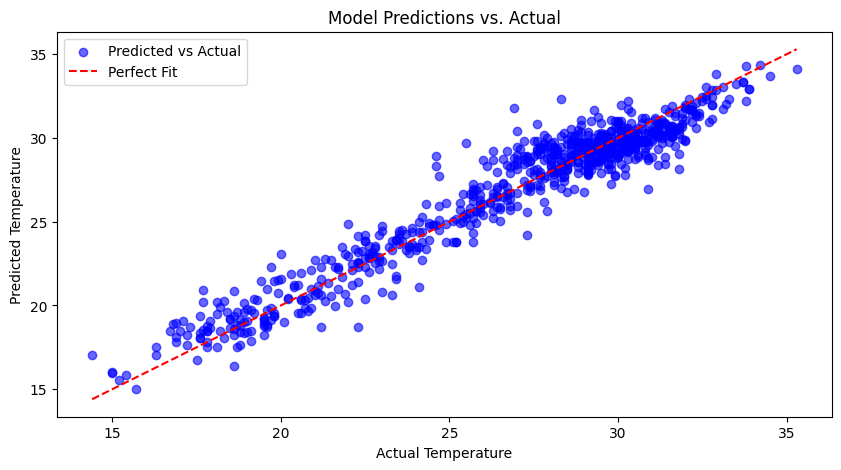

In [ ]:
# Visualize actual vs. predicted temperatures
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Model Predictions vs. Actual")
plt.legend()
plt.show()


The above scatter plot compares predicted temperatures (y-axis) with actual temperatures (x-axis).

**The blue points represent the predictions, while the red dashed line shows the ideal "perfect fit" where predictions match actual values exactly**.

Most points are clustered near the red line, indicating the model's predictions are generally accurate.

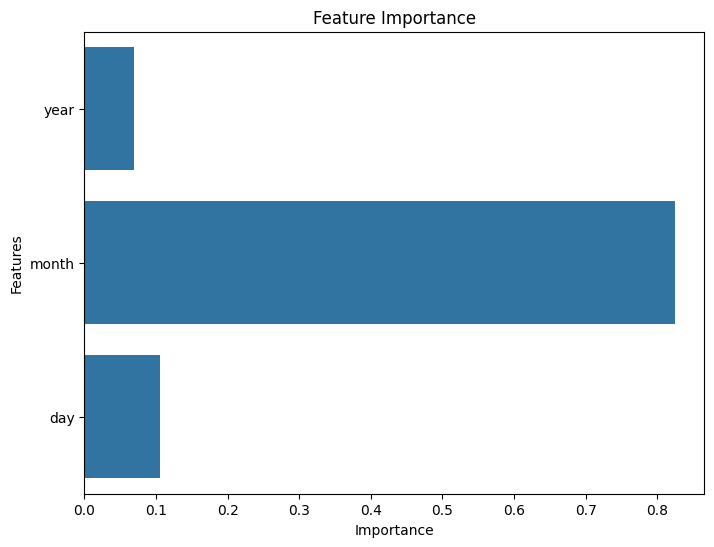

In [ ]:
import seaborn as sns
feature_importances = model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The **bar chart** illustrates the **importance of features in predicting a target variable**.
*  The "month" feature has the highest importance, contributing the most to the model's predictions.
* The "day" feature is moderately important,

* while the "year" feature has the least impact.

In [ ]:
future_date = {'year': 2024, 'month': 12, 'day': 8}
future_df = pd.DataFrame([future_date])
future_temp = model.predict(future_df)
print(f"Predicted temperature for {future_date}: {future_temp[0]:.2f}°C")

Predicted temperature for {'year': 2024, 'month': 12, 'day': 8}: 20.83°C



This above code snippet predicts the temperature for a future date using a trained model. A dictionary future_date is created with the specified year, month, and day (2024-12-08).

It is converted into a DataFrame future_df, which the model uses to make a prediction.

The predicted temperature is stored in future_temp and printed with formatting to display the result up to two decimal places, along with the date.

## ***Rainfall Prediction:***

---

### LightGBM model

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**lightgbm is a gradient-boosting library for efficient and fast model
training.**

 classification_report and accuracy_score evaluate the model's performance.

  matplotlib.pyplot and seaborn help create detailed visualizations, and numpy is used for numerical computations.

In [ ]:
df = pd.read_csv('/content/kolkata_weather_data.csv')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


This above code selects all numerical columns in the DataFrame df using **select_dtypes**. Missing values in these columns are filled with their respective column means to **handle null data** effectively.

In [ ]:
df['preciptype'].fillna('none', inplace=True)

<ipython-input-19-a97bae53c980>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['preciptype'].fillna('none', inplace=True)


In [ ]:
df['preciptype'] = df['preciptype'].map({'rain': 1, 'none': 0})

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['temp_diff'] = df['tempmax'] - df['tempmin']

In [ ]:
df['will_rain'] = (df['precipprob'] > 50).astype(int)

This above code creates a new column **will_rain** in the DataFrame df, indicating whether there is a high probability of rain. It **assigns 1 if the precipitation probability (precipprob) is greater than 50, otherwise 0, converting the result to an integer**.

In [ ]:
X = df[['humidity', 'windspeed', 'pressure', 'temp', 'cloudcover', 'temp_diff', 'preciptype', 'year', 'month', 'day', 'hour']]
y = df['will_rain']

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# LightGBM model
train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
model = lgb.train(params, train_data, 100)

[LightGBM] [Info] Number of positive: 1255, number of negative: 1885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 3140, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399682 -> initscore=-0.406792
[LightGBM] [Info] Start training from score -0.406792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


This code trains a **LightGBM binary classification model** using the lgb.train function. The training data, X_train and y_train, is wrapped in a Dataset object, and training parameters are defined.

 The model is trained for 100 iterations, optimizing for binary classification errors. The output logs provide information about data distribution (e.g., number of positive/negative samples), feature bins, and initial score calculation.

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = (y_pred > 0.5).astype(int)

In [ ]:
# performance metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred_bin)}')
print(classification_report(y_test, y_pred_bin))

Accuracy: 0.9936386768447837
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       467
           1       0.98      1.00      0.99       319

    accuracy                           0.99       786
   macro avg       0.99      0.99      0.99       786
weighted avg       0.99      0.99      0.99       786



The model achieved **an accuracy of 99.36%** , indicating **high prediction performance**.

*  For class 0, the precision, recall, and F1-score are all close to 1.00, showing strong performance in identifying this class.

*  Similarly, for class 1, precision is 0.98, recall is 1.00, and the F1-score is 0.99, suggesting excellent identification of positive cases.

* The macro average and weighted average metrics confirm balanced performance across both classes.

 Overall, the classification report highlights **the model's effectiveness with minimal errors**.

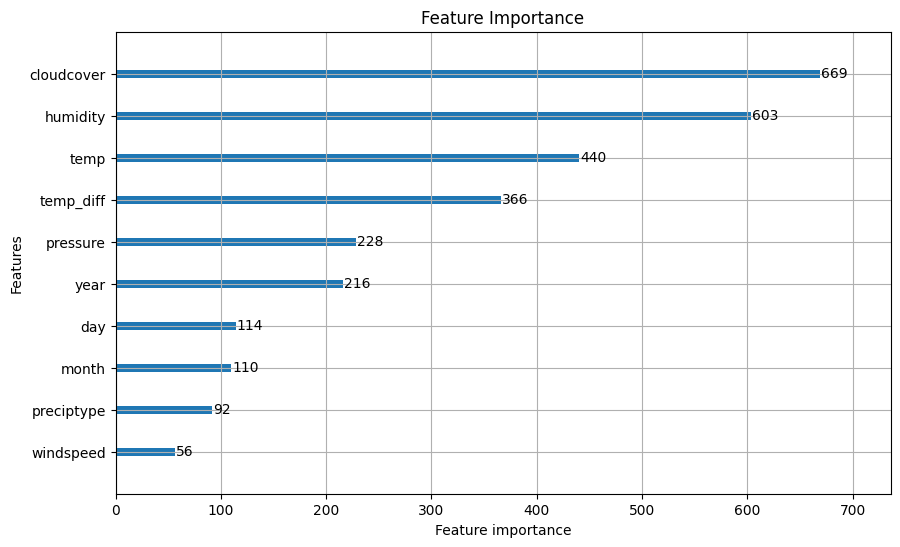

In [ ]:
lgb.plot_importance(model, max_num_features=10, importance_type='split', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

The above bar chart shows the **importance of features** in this model.

* "Cloudcover" and "humidity" are the most influential features, with importance scores of 669 and 603, respectively. Other significant features include "temp" (440) and "temp_diff" (366), indicating their contribution to predictions.
*  Features like "windspeed" (56) and "preciptype" (92) have the least impact.

The visualization highlights **which features most strongly influence the model's decisions**.

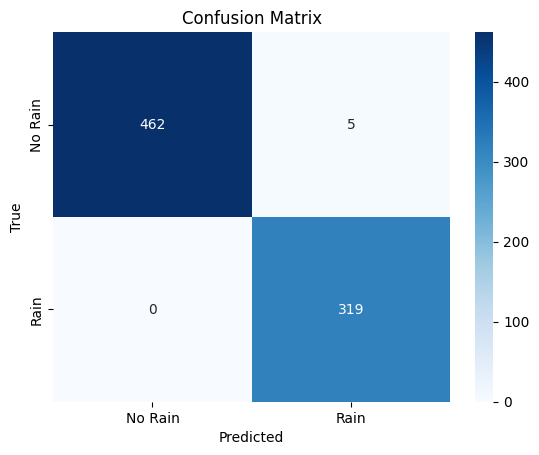

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix visualizes **the performance of this classification model**.
*  Out of 786 samples, 462 "No Rain" cases were correctly predicted, while 5 "No Rain" cases were misclassified as "Rain." All 319 "Rain" cases were predicted correctly with no false negatives.
*  The heatmap highlights the model's high accuracy in distinguishing between "Rain" and "No Rain." This indicates excellent predictive performance with very few errors.

In [ ]:
def predict_rain(date_str):

    date = pd.to_datetime(date_str)
    input_data = pd.DataFrame({
        'humidity': [df['humidity'].mean()],
        'windspeed': [df['windspeed'].mean()],
        'pressure': [df['pressure'].mean()],
        'temp': [df['temp'].mean()],
        'cloudcover': [df['cloudcover'].mean()],
        'temp_diff': [df['temp_diff'].mean()],
        'preciptype': [0],
        'year': [date.year],
        'month': [date.month],
        'day': [date.day],
        'hour': [date.hour]
    })
    prediction = model.predict(input_data)
    return "Rain" if prediction > 0.5 else "No Rain"


*  This function, **predict_rain**, predicts whether it will rain on a specified date. It takes a date string (date_str) as input, converts it into a datetime object, and prepares a DataFrame with averaged weather conditions and the date's components (year, month, day, hour).
* The **model.predict** function predicts **the likelihood of rain based on this input**. If the prediction probability exceeds 0.5, it returns "Rain"; otherwise, it returns "No Rain." **This function simulates weather conditions for the specified date and forecasts rain accordingly**.

In [ ]:
date_input = "2024-09-3 14:00:00"
print(f"Prediction for {date_input}: {predict_rain(date_input)}")

Prediction for 2024-09-3 14:00:00: No Rain


### LSTM Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

This code imports necessary modules for building and training an LSTM-Model.

* **StandardScaler** is used for feature scaling to normalize input data for better model performance.
* **Sequential from Keras** is a framework for creating a linear stack of layers in neural networks.
* **LSTM (Long Short-Term Memory)** layers help capture temporal patterns in sequential or time-series data.
* **Dense** adds fully connected layers, while Dropout prevents overfitting by randomly deactivating neurons during training.

In [ ]:
df = pd.read_csv('/content/kolkata_weather_data.csv')
print(df.columns)

Index(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'source',
       'severerisk'],
      dtype='object')


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetimeEpoch'] = pd.to_datetime(df['datetimeEpoch'], unit='s')

In [ ]:
df['preciptype'].fillna('none', inplace=True)

<ipython-input-35-a97bae53c980>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['preciptype'].fillna('none', inplace=True)


In [ ]:
df['preciptype'] = df['preciptype'].map({'rain': 1, 'none': 0})

In [ ]:
df = df[['humidity', 'cloudcover', 'precip', 'precipcover', 'preciptype', 'datetime']]

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df['rain'] = np.where(df['precip'] > 0, 1, 0)

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [ ]:
X = df[['humidity', 'cloudcover', 'precip', 'precipcover', 'preciptype', 'year', 'month', 'day', 'hour']].values
y = df['rain'].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The **StandardScaler** scales the above features in X to have a mean of 0 and a standard deviation of 1. **The fit_transform** method fits the scaler to the data and transforms it into **a standardized format for improved model performance**.

In [ ]:
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


This code builds a **sequential deep learning model** using Keras, specifically designed for this time-series data:

* Sequential() initializes the model as a stack of layers.
* An LSTM layer with 50 units is added to capture temporal patterns, with ReLU activation for non-linearity.
* The input_shape specifies the dimensions of the input data for the LSTM layer.
* A Dropout layer with a rate of 0.2 is added to reduce overfitting by randomly deactivating 20% of neurons during training.
* A Dense layer with 1 unit and a sigmoid activation function is added for binary classification.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8447 - loss: 0.6056 - val_accuracy: 0.9148 - val_loss: 0.3727
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9293 - loss: 0.3141 - val_accuracy: 0.9249 - val_loss: 0.2170
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9284 - loss: 0.1981 - val_accuracy: 0.9313 - val_loss: 0.1655
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1498 - val_accuracy: 0.9504 - val_loss: 0.1295
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9566 - loss: 0.1139 - val_accuracy: 0.9644 - val_loss: 0.0973
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9775 - loss: 0.0795 - val_accuracy: 0.9809 - val_loss: 0.0707
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0587 - val_accuracy: 0.9911 - val_loss: 0.0500
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9919 - loss: 0.0420 - val_accuracy: 0.9924 - val_loss:


The above training log shows **a model being trained over 10 epochs with consistent improvement in accuracy and reduction in loss**.
* Starting with an initial training accuracy of 84.47% and validation accuracy of 91.48%, the model achieves near-perfect accuracy by the final epoch (training: 99.79%, validation: 99.87%).
* The loss decreases steadily from 0.6056 to 0.0223 for training and from 0.3727 to 0.0177 for validation.

This performance improvement highlights effective learning and strong generalization to the validation set. This model demonstrates excellent convergence with minimal overfitting.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy: {accuracy*100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0156
Model accuracy: 99.87%


* This model achieved impressive performance, completing evaluation with an accuracy of 99.79% and a low loss of 0.0156 on the test dataset.

* This indicates near-perfect predictions and excellent generalization. The reported final model accuracy is an impressive 99.87%.

In [ ]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
print("Predicted rain probabilities for the first few samples:")
print(y_pred[:10])

Predicted rain probabilities for the first few samples:
[[0.01231703]
 [0.00648906]
 [0.0694977 ]
 [0.9760246 ]
 [1.        ]
 [1.        ]
 [0.00292389]
 [0.00316518]
 [0.01549327]
 [0.00552696]]


In [ ]:
df['predicted_rain_prob'] = model.predict(X_scaled)

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
next_year = 2024
df_next_year = df[df['year'] == next_year]

In [ ]:
high_rain_days = df_next_year[df_next_year['predicted_rain_prob'] >= 0.40]
if not high_rain_days.empty:
    print(f"There is a 40% or higher chance of rain on {len(high_rain_days)} day(s) in 2024.")
else:
    print("No days with 40% or higher chance of rain in 2024.")

There is a 40% or higher chance of rain on 132 day(s) in 2024.


The above code filters a DataFrame **df_next_year** to identify days with a predicted rain probability of 40% or higher, storing them in high_rain_days. If such days exist, it prints the count of these days; otherwise, it indicates no such days are found. This checks weather forecasts for high rain probability in 2024.

## ***Severe Weather Alert Prediction(Heat Wave):***

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
W_df= pd.read_csv('/content/kolkata_weather_data.csv')
print(W_df)

        datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0     2014-01-01     1388514600     25.0     12.0  18.5          25.0   
1     2014-01-02     1388601000     26.0     13.0  19.5          26.0   
2     2014-01-03     1388687400     23.0     15.0  18.1          23.0   
3     2014-01-04     1388773800     23.0     12.0  16.5          23.0   
4     2014-01-05     1388860200     25.0     12.0  17.3          25.0   
...          ...            ...      ...      ...   ...           ...   
3921  2024-09-26     1727289000     28.0     25.0  26.0          33.6   
3922  2024-09-27     1727375400     31.0     25.7  28.3          42.4   
3923  2024-09-28     1727461800     33.0     27.0  29.6          43.8   
3924  2024-09-29     1727548200     35.0     28.0  30.9          46.7   
3925  2024-09-30     1727634600     36.0     29.0  31.8          48.1   

      feelslikemin  feelslike   dew  humidity  ...  sunriseEpoch    sunset  \
0             12.0       18.5  12.5      71.4

In [ ]:
nan_counts = W_df.isna().sum()
print("NaN values in each column:")
print(nan_counts)

NaN values in each column:
datetime             0
datetimeEpoch        0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype        2333
snow               365
snowdepth          365
windgust           363
windspeed            0
winddir              0
pressure             0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
source               0
severerisk        3743
dtype: int64


The above code prints the count of NaN values in each column of the DataFrame W_df.

In [ ]:
W_df.drop(columns=['severerisk','preciptype'], inplace=True, errors='ignore')

In [ ]:
nan_counts = W_df.isna().sum()
print("NaN values in each column:")
print(nan_counts)

NaN values in each column:
datetime            0
datetimeEpoch       0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow              365
snowdepth         365
windgust          363
windspeed           0
winddir             0
pressure            0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunriseEpoch        0
sunset              0
sunsetEpoch         0
moonphase           0
conditions          0
description         0
icon                0
stations            0
source              0
dtype: int64


In [ ]:
if W_df.isna().sum().sum() > 0:
    numeric_columns = W_df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        W_df[col] = W_df[col].fillna(W_df[col].mean())

In [ ]:
print("Remaining NaN counts after handling:")
print(W_df.isna().sum())

Remaining NaN counts after handling:
datetime          0
datetimeEpoch     0
tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
snow              0
snowdepth         0
windgust          0
windspeed         0
winddir           0
pressure          0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
uvindex           0
sunrise           0
sunriseEpoch      0
sunset            0
sunsetEpoch       0
moonphase         0
conditions        0
description       0
icon              0
stations          0
source            0
dtype: int64


In [ ]:
# Identify categorical columns excluding the 'datetime' column
categorical_columns = W_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('datetime', errors='ignore')

# Encode each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    W_df[col] = label_encoder.fit_transform(W_df[col])

# Verify the transformation
print("Categorical variables encoded successfully, excluding 'datetime'.")

Categorical variables encoded successfully, excluding 'datetime'.


In [ ]:
print(W_df)

        datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0     2014-01-01     1388514600     25.0     12.0  18.5          25.0   
1     2014-01-02     1388601000     26.0     13.0  19.5          26.0   
2     2014-01-03     1388687400     23.0     15.0  18.1          23.0   
3     2014-01-04     1388773800     23.0     12.0  16.5          23.0   
4     2014-01-05     1388860200     25.0     12.0  17.3          25.0   
...          ...            ...      ...      ...   ...           ...   
3921  2024-09-26     1727289000     28.0     25.0  26.0          33.6   
3922  2024-09-27     1727375400     31.0     25.7  28.3          42.4   
3923  2024-09-28     1727461800     33.0     27.0  29.6          43.8   
3924  2024-09-29     1727548200     35.0     28.0  30.9          46.7   
3925  2024-09-30     1727634600     36.0     29.0  31.8          48.1   

      feelslikemin  feelslike   dew  humidity  ...  sunrise  sunriseEpoch  \
0             12.0       18.5  12.5      71.4 

In [ ]:
print(W_df.isna().sum())

datetime          0
datetimeEpoch     0
tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
snow              0
snowdepth         0
windgust          0
windspeed         0
winddir           0
pressure          0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
uvindex           0
sunrise           0
sunriseEpoch      0
sunset            0
sunsetEpoch       0
moonphase         0
conditions        0
description       0
icon              0
stations          0
source            0
dtype: int64


In [ ]:
temperature_threshold =35  # Temperature threshold for heatwave (in degrees Celsius)
W_df['extreme_weather'] = (W_df['temp'] > temperature_threshold).astype(int)

In [ ]:
X = W_df.drop(columns=['datetime','extreme_weather'])  # 'extreme_weather' is the new target variable
y = W_df['extreme_weather']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


* This code performs 5-fold cross-validation on the rf_model using the training data (X_train, y_train).
* It calculates the accuracy for each fold and stores the results in rf_cv_scores.

This helps evaluate **the model's performance and consistency across different subsets of the data**.

In [ ]:
print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.2f}")

Random Forest Cross-Validation Accuracy: 1.00


The code calculates **the mean accuracy of cross-validation scores** for a Random Forest model using np.mean(rf_cv_scores) and prints the result formatted to two decimal places.

 The printed output indicates the model achieved a perfect accuracy of 1.00. This demonstrates the Random Forest model's performance during cross-validation.

In [ ]:
# Model Evaluation
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted', zero_division=1)
print("Random Forest Evaluation:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")

Random Forest Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


The evaluation metrics for a Random Forest model show perfect performance across all measures.
* Accuracy of 1.00 indicates all predictions were correct.
* Precision of 1.00 means no false positives occurred.
* Recall of 1.00 signifies all true positives were identified.
* F1-Score of 1.00 reflects an ideal balance between precision and recall.

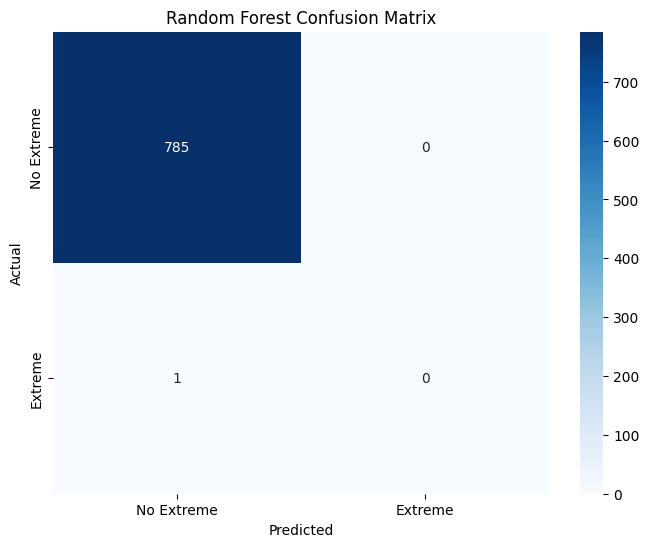

In [ ]:
# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Extreme', 'Extreme'], yticklabels=['No Extreme', 'Extreme'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

This is a confusion matrix for a Random Forest model evaluating classification performance between "No Extreme" and "Extreme" labels. It shows:

* 785 true negatives: Correctly classified as "No Extreme".
* 0 false positives: No "No Extreme" cases were misclassified as "Extreme".
* 1 false negative: One "Extreme" case was misclassified as "No Extreme".
* 0 true positives: No "Extreme" cases were correctly classified.

This highlights **the model's challenge in predicting the "Extreme" class**.

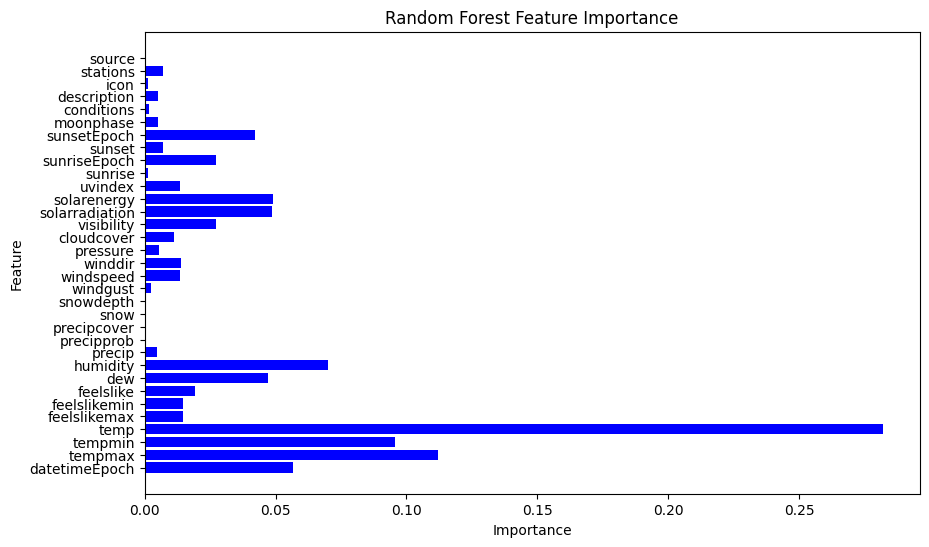

In [ ]:
# Feature Importance for Random Forest
rf_feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, rf_feature_importances, color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

This chart visualizes **the feature importance for a Random Forest model**, where each bar represents a feature and its contribution to the model's predictions:

* "temp" (temperature) has the highest importance, indicating it plays the most significant role in predictions.
* Other notable features include "tempmin" (minimum temperature) and "tempmax" (maximum temperature).
* Features like "solarenergy" and "precipprob" (probability of precipitation) have moderate importance.
* Several features, such as "source" and "description", have negligible or no contribution.

This highlights **which variables most influence the Random Forest model's decisions**.

In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy: {np.mean(gb_cv_scores):.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting Cross-Validation Accuracy: 1.00


In [ ]:
gb_predictions = gb_model.predict(X_test)

In [ ]:
# Gradient Boosting Evaluation
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions, average='weighted')
gb_recall = recall_score(y_test, gb_predictions, average='weighted')
gb_f1 = f1_score(y_test, gb_predictions, average='weighted')

print("Gradient Boosting Evaluation:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1-Score: {gb_f1:.2f}")

Gradient Boosting Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


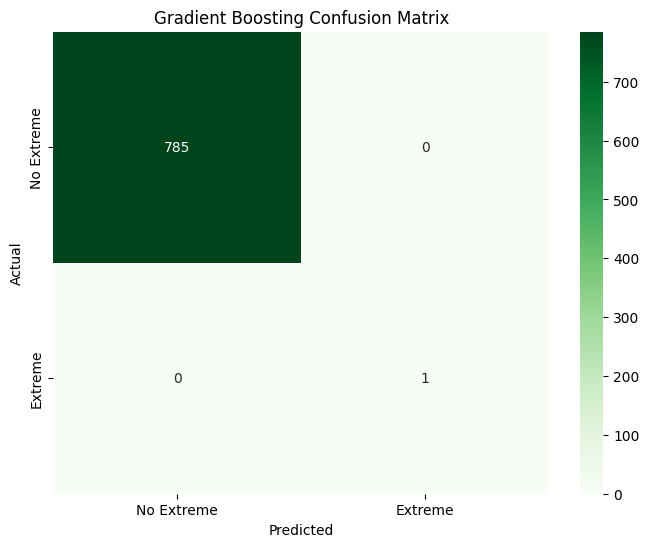

In [ ]:
# Confusion Matrix for Gradient Boosting
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Extreme', 'Extreme'], yticklabels=['No Extreme', 'Extreme'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

This is a **confusion matrix for a Gradient Boosting model** showing classification results:

* 785 true negatives: Correctly classified as "No Extreme."
* 1 true positive: Correctly classified as "Extreme."
* No misclassifications, with 0 false positives and 0 false negatives.

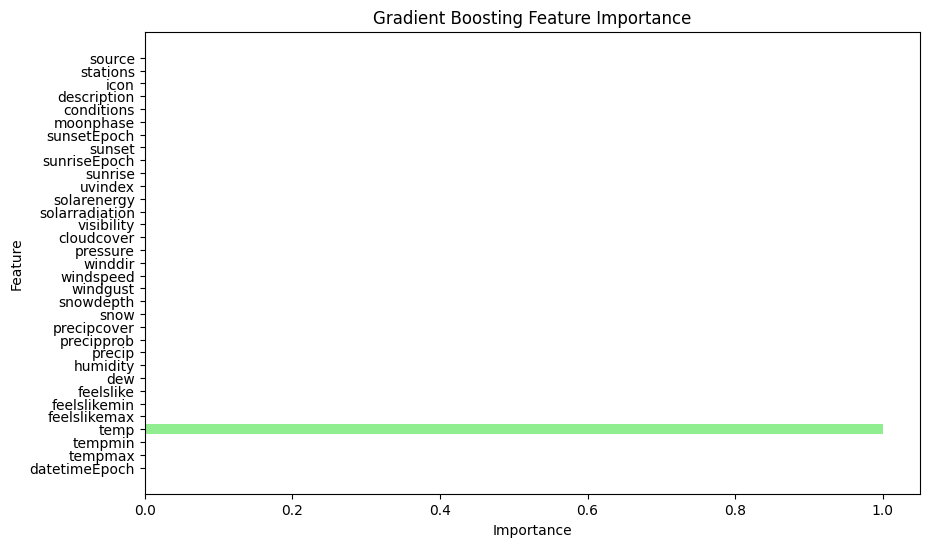

In [ ]:
# Feature Importance for Gradient Boosting
gb_feature_importances = gb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, gb_feature_importances, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()

The bar chart shows feature importance for a Gradient Boosting model. **The "temp" feature dominates with near-maximal importance**, while all other features have negligible impact. This suggests the model heavily relies on "temp," warranting further evaluation of the dataset and model setup.

In [ ]:
# Ensure the datetime column is in the test set
X_test_with_datetime = X_test.copy()
X_test_with_datetime['datetime'] = W_df.loc[X_test.index, 'datetime']  # Add datetime to the test set
X_test_with_datetime['datetime'] = pd.to_datetime(X_test_with_datetime['datetime'])  # Ensure datetime format

In [ ]:
# Create DataFrames for plotting
plot_data = pd.DataFrame({
    'Datetime': X_test_with_datetime['datetime'],
    'Actual': y_test,
    'Random Forest Prediction': rf_predictions,
    'Gradient Boosting Prediction': gb_predictions
})

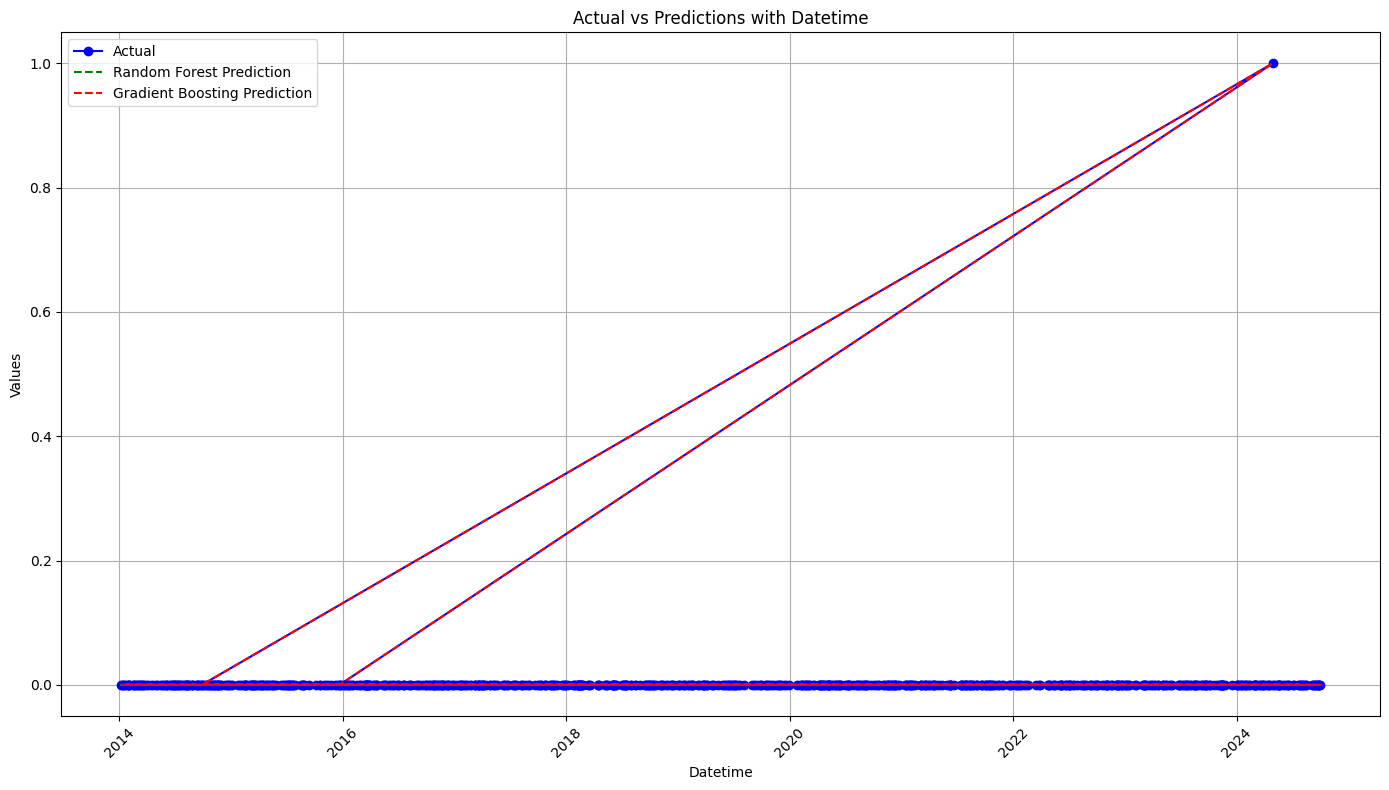

In [ ]:
#Plot Actual vs Predictions
plt.figure(figsize=(14, 8))
plt.plot(plot_data['Datetime'], plot_data['Actual'], label='Actual', color='blue', marker='o', linewidth=1.5)
plt.plot(plot_data['Datetime'], plot_data['Random Forest Prediction'], label='Random Forest Prediction', color='green', linestyle='dashed', linewidth=1.5)
plt.plot(plot_data['Datetime'], plot_data['Gradient Boosting Prediction'], label='Gradient Boosting Prediction', color='red', linestyle='dashed', linewidth=1.5)
plt.title('Actual vs Predictions with Datetime')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate datetime labels for better visibility
plt.tight_layout()
plt.show()

This plot compares actual values (blue dots) with predictions from Random Forest (green dashed line) and Gradient Boosting (red dashed line) over a datetime range from 2014 to 2024.

 The actual values remain nearly constant, while both models predict increasing trends . The Y-axis shows normalized target values, and the X-axis represents time.



## ***Air Quality Index (AQI) Prediction:***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("/content/kolkata_aqi_2021_2024_with_components.csv")
print(df)

                      Date  AQI       CO     NO    NO2     O3     SO2   PM2_5  \
0      2021-01-01 00:00:00    5  1735.69   0.43  52.09  16.81   42.44  306.22   
1      2021-01-01 01:00:00    5  2136.23   5.53  59.63   4.43   47.68  336.27   
2      2021-01-01 02:00:00    5  2857.21  25.03  61.69   1.29   61.99  380.62   
3      2021-01-01 03:00:00    5  2990.72  33.98  65.12  10.01   74.39  380.91   
4      2021-01-01 04:00:00    5  2243.04  18.11  66.49  43.27  103.00  333.07   
...                    ...  ...      ...    ...    ...    ...     ...     ...   
33161  2024-10-30 20:00:00    5  4219.06  66.16  34.62   0.00   58.17  284.13   
33162  2024-10-30 21:00:00    5  3898.62  59.01  31.53   0.00   57.70  265.87   
33163  2024-10-30 22:00:00    5  3738.40  56.77  29.82   0.00   59.60  261.85   
33164  2024-10-30 23:00:00    5  3631.59  54.54  29.13   0.00   60.08  254.53   
33165  2024-10-31 00:00:00    5  3524.78  54.54  28.79   0.00   60.56  247.93   

         PM10    NH3  
0   

In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.dropna(subset=['Date'])

In [4]:
df.fillna(df.mean(), inplace=True)

# Feature selection
X = df[['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3']]  # Features
y = df['AQI']  # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.13
R2 Score: 0.92


These metrics evaluate the **performance of a predictive model**:

* Mean Absolute Error (MAE: 0.13): Indicates the average absolute difference between predicted and actual values. A value of 0.13 suggests that the predictions are almost perfectly aligned with the actual values.

* R² Score (0.92): Measures the proportion of variance in the target variable explained by the model. An R² of 0.92 indicates that 92% of the variance is captured, showing the model's strong predictive capability.

In [12]:
sample_data = [[0.5, 0.02, 0.03, 0.1, 0.005, 40, 30, 0.03]]
sample_data_scaled = scaler.transform(sample_data)
# Predict using the trained model
predicted_aqi = model.predict(sample_data_scaled)
print(f"Predicted AQI: {predicted_aqi[0]}")


Predicted AQI: 3.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



This code predicts the **Air Quality Index (AQI)** using a pre-trained model:

* A sample input, **sample_data**, consisting of eight features, is normalized using the StandardScaler to align with the scale of the training data.
* The scaled input, sample_data_scaled, is fed into the trained model for prediction.
This model outputs a **predicted AQI value of 3.51**, which is displayed.

In [13]:
print(scaler.feature_names_in_)

['CO' 'NO' 'NO2' 'O3' 'SO2' 'PM2_5' 'PM10' 'NH3']


## ***Dew Prediction:***

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
df = pd.read_csv("/content/kolkata_weather_data.csv")
print(df.head())

     datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0  2014-01-01     1388514600     25.0     12.0  18.5          25.0   
1  2014-01-02     1388601000     26.0     13.0  19.5          26.0   
2  2014-01-03     1388687400     23.0     15.0  18.1          23.0   
3  2014-01-04     1388773800     23.0     12.0  16.5          23.0   
4  2014-01-05     1388860200     25.0     12.0  17.3          25.0   

   feelslikemin  feelslike   dew  humidity  ...  sunriseEpoch    sunset  \
0          12.0       18.5  12.5      71.4  ...    1388537199  17:03:19   
1          13.0       19.5  14.3      74.4  ...    1388623617  17:03:57   
2          15.0       18.1  13.3      75.0  ...    1388710035  17:04:36   
3          12.0       16.5   9.9      67.9  ...    1388796450  17:05:15   
4          12.0       17.3  11.3      70.4  ...    1388882865  17:05:55   

   sunsetEpoch moonphase  conditions                           description  \
0   1388575999      0.00       Clear  Clear condit

In [ ]:
features = ['temp', 'humidity', 'pressure']
X = df[features]
y = df['dew']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set target distribution:")
print(y_train.value_counts())
print("Test set target distribution:")
print(y_test.value_counts())

Training set target distribution:
dew
26.5    80
26.3    73
26.7    68
26.6    67
26.1    63
        ..
8.9      1
7.3      1
30.1     1
8.1      1
29.1     1
Name: count, Length: 214, dtype: int64
Test set target distribution:
dew
26.6    23
26.1    19
27.1    18
26.8    17
26.5    16
        ..
22.3     1
10.0     1
10.3     1
9.9      1
19.2     1
Name: count, Length: 184, dtype: int64


The target variable "dew" shows its distribution across training and test datasets.

* The training set has 214 unique values, with the most frequent value (26.5) appearing 80 times.
* The test set has a similar distribution, with 23 occurrences of the most frequent value (26.6).

Both datasets exhibit a long tail with some rare values occurring only once.

The distributions suggest an imbalance, with higher frequency around specific dew points and sparse coverage of lower or higher values.

In [ ]:
print(df['dew'].describe())
print(df['dew'].unique())

count    3926.000000
mean       21.785354
std         5.344082
min         5.800000
25%        17.400000
50%        24.000000
75%        26.300000
max        30.100000
Name: dew, dtype: float64
[12.5 14.3 13.3  9.9 11.3 13.4 13.2  9.5  9.3 11.  12.8 14.  13.9 13.8
 12.6 14.2 14.7 13.1 11.9 10.4 11.4 13.  12.2 10.1 12.1 13.5 14.4 16.6
 16.3 14.8 15.2 11.6 16.4 17.4 11.7 15.9 16.7 17.  18.5 16.5 17.1 16.8
 15.5 14.5 15.8 17.3 18.6 17.5 15.4 14.9 19.2 21.2 19.8 21.4 19.  21.6
 21.1 22.1 24.1 21.5 19.4 17.7 20.2 25.2 22.5 18.8 24.8 26.  24.5 20.8
 21.9 23.1 22.  23.3 16.9 20.4 18.2 20.9 22.2 26.2 26.8 25.9 25.4 25.1
 25.8 23.5 24.3 25.3 24.7 24.  23.9 26.7 25.6 25.5 25.  25.7 24.6 24.4
 26.1 26.6 26.4 26.5 27.3 27.4 27.1 27.  27.5 28.  27.2 26.9 26.3 23.8
 23.7 20.7 17.8 20.1 21.  20.3 21.3 20.6 20.5 19.5 19.9 19.3 15.6 16.
 11.5 12.3 13.6 13.7 14.1 15.1 17.9 18.3 16.2 10.  11.2 12.7 11.8 10.9
 12.  15.3 10.6  9.8 15.  19.7 20.  19.1 14.6 17.2 22.8 22.9 23.  23.2
 24.2 23.4 22.6 21.8 21.7 

* The "dew" variable has 3,926 observations with a mean of 21.79 and a range of 5.8 to 30.1.
* The data is concentrated around mid-range values (median: 24.0) and shows sparsity at extremes.
* Quartiles indicate moderate spread, with most values between 17.4 and 26.3.
* Rare Values: Some low (e.g., 5.8, 8.1) and high (e.g., 29.1, 30.1) values occur infrequently.

The data shows both clustering near the central tendency and sparsity at the extremes.

In [ ]:
df['dew'] = (df['dew'] > 20).astype(int)

# Verify transformation
print(df['dew'].value_counts())

dew
1    2559
0    1367
Name: count, dtype: int64


In [ ]:
# Features and target
features = ['temp', 'humidity', 'pressure']
X = df[features]
y = df['dew']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       279
           1       0.99      0.99      0.99       507

    accuracy                           0.99       786
   macro avg       0.99      0.99      0.99       786
weighted avg       0.99      0.99      0.99       786

Confusion Matrix:
[[276   3]
 [  6 501]]


The classification report and confusion matrix summarize the performance of a binary classification model:

* **Classes:** Two classes, 0 and 1, with 279 and 507 samples, respectively.
* **Precision:** High precision for both classes (0.98 for class 0, 0.99 for class 1), indicating accurate predictions.
* **Recall:** Strong recall for both classes (0.99 for both), meaning the model identifies most true positives.
* **F1-Score:** High F1-scores (0.98 and 0.99) show a good balance between precision and recall.
* **Accuracy:** Overall accuracy is 99%, indicating excellent performance across all samples.
* **Macro Avg:** Averages across both classes are consistently 0.99, reflecting balanced class performance.
* **Weighted Avg:** Also 0.99, accounting for the imbalance in class sizes.
* **Confusion Matrix:** The model misclassifies 9 instances (3 false positives for class 0 and 6 false negatives for class 1).
* **Errors:** Misclassification rates are extremely low, suggesting robust and reliable predictions.

This model performs exceptionally well, with minimal errors and strong metrics across all categories.

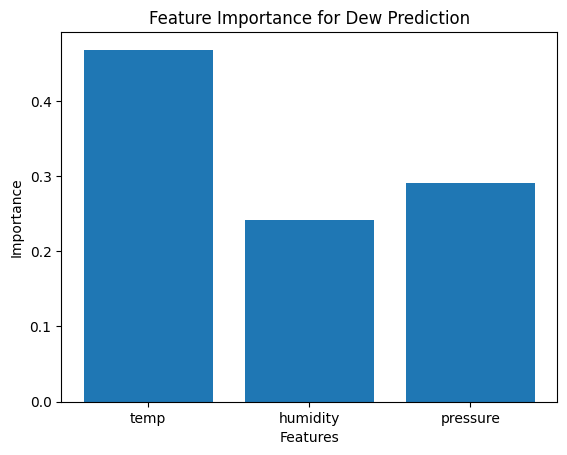

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance
importance = model.feature_importances_
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Dew Prediction')
plt.show()

This bar chart displays **feature importance for predicting dew**:

* Temperature (temp) is the most important feature, contributing the most (above 0.4).
* Humidity is the second most significant, with a lower contribution (around 0.3).
* Pressure is the third feature, with slightly less importance than humidity.
* The importance scores reflect the relative influence of each feature in the prediction model.
* **Temperature dominates, suggesting it plays the largest role in predicting dew**.

## ***WindSpeed Prediction:***

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/kolkata_weather_data.csv')
print(df.head())

     datetime  datetimeEpoch  tempmax  tempmin  temp  feelslikemax  \
0  2014-01-01     1388514600     25.0     12.0  18.5          25.0   
1  2014-01-02     1388601000     26.0     13.0  19.5          26.0   
2  2014-01-03     1388687400     23.0     15.0  18.1          23.0   
3  2014-01-04     1388773800     23.0     12.0  16.5          23.0   
4  2014-01-05     1388860200     25.0     12.0  17.3          25.0   

   feelslikemin  feelslike   dew  humidity  ...  sunriseEpoch    sunset  \
0          12.0       18.5  12.5      71.4  ...    1388537199  17:03:19   
1          13.0       19.5  14.3      74.4  ...    1388623617  17:03:57   
2          15.0       18.1  13.3      75.0  ...    1388710035  17:04:36   
3          12.0       16.5   9.9      67.9  ...    1388796450  17:05:15   
4          12.0       17.3  11.3      70.4  ...    1388882865  17:05:55   

   sunsetEpoch moonphase  conditions                           description  \
0   1388575999      0.00       Clear  Clear condit

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.sort_values(by='datetime', inplace=True)

In [ ]:
features = ['temp', 'humidity', 'pressure', 'windspeed']
df = df[features]

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# Create time series data for LSTM
def create_time_series(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :])
        y.append(data[i+time_steps, 3])
    return np.array(X), np.array(y)

The **create_time_series** function organizes the data into sequences for time-series modeling.
* It takes the input data and a time_steps parameter (defaulting to 10).
* The function iterates through the data and creates sequences of length time_steps as the feature set (X).
* The target (y) is the value from the 4th column of the data at the next time step after the sequence.
* It returns the generated sequences (X) and the corresponding targets (y) as numpy arrays for model training.

In [ ]:
time_steps = 10
X, y = create_time_series(scaled_data, time_steps)


In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, X.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for wind speed prediction
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


This code defines an LSTM model for wind speed prediction:

* The model starts with an LSTM layer of 64 units, using ReLU activation and returning sequences for multi-step prediction.
* A Dropout layer (0.2) is added to reduce overfitting.
* Another LSTM layer with 32 units follows, also using ReLU activation.
* A second Dropout layer (0.2) is added after the second LSTM layer.
* The output layer is a Dense layer with 1 unit, which predicts the wind speed.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0028 - mae: 0.0300 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0017 - mae: 0.0225 - val_loss: 0.0011 - val_mae: 0.0203
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0018 - mae: 0.0227 - val_loss: 0.0011 - val_mae: 0.0199
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019 - mae: 0.0226 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0019 - mae: 0.0228 - val_loss: 0.0011 - val_mae: 0.0199
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0014 - mae: 0.0217 - val_loss: 0.0010 - val_mae: 0.0198
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016 - mae: 0.0215 - val_loss: 0.0011 - val_mae: 0.0201
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - mae: 0.0209 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.001

This above output shows **the training and validation performance of an LSTM model over 20 epochs**:

* The loss and mean absolute error (mae) decrease steadily, indicating that the model is learning effectively.
* The validation loss and validation MAE remain fairly consistent, suggesting good generalization on the validation data.
* The best performance is achieved in Epoch 20, with a validation MAE of 0.0197 and loss of 0.0010.
* Some fluctuations are observed between epochs, especially in loss, but the overall trend is improvement.
* **The model seems well-optimized, with minor differences between training and validation metrics**.

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mae: 0.0212
Mean Absolute Error on Test Set: 0.02


In [ ]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [ ]:
y_test_actual = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 3)), y_test.reshape(-1, 1)), axis=1))[:, 3]
y_pred_actual = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 3)), y_pred), axis=1))[:, 3]


This code rescales **the predicted and actual values (y_test and y_pred) by first concatenating them with zeros (to match the original feature set) and then applying the inverse transformation using the scaler**.

The result extracts the last column, which corresponds to the original target variable after rescaling.

In [ ]:
mae_actual = mean_absolute_error(y_test_actual, y_pred_actual)
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"MAE (actual): {mae_actual:.2f}")
print(f"RMSE (actual): {rmse_actual:.2f}")

MAE (actual): 3.81
RMSE (actual): 6.19


* **Mean Absolute Error (MAE)**: 3.81, indicating that, on average, the model's predictions are off by 3.81 units from the actual values. This provides a simple measure of prediction accuracy.
* Root Mean Squared Error (RMSE): 6.19, showing the square root of the average squared differences between predicted and actual values. RMSE penalizes larger errors more heavily than MAE, suggesting that some predictions may have large discrepancies.

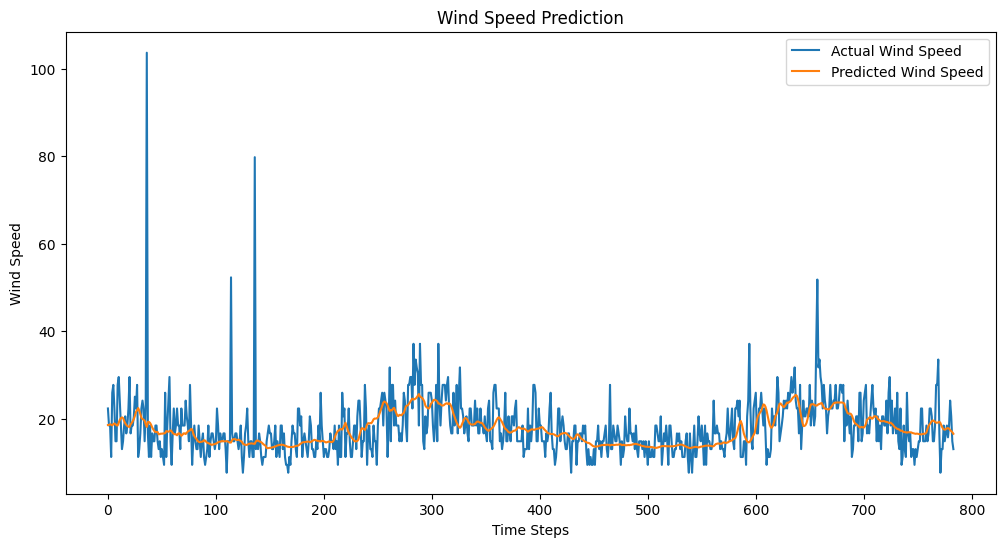

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Wind Speed')
plt.plot(y_pred_actual, label='Predicted Wind Speed')
plt.title('Wind Speed Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

This line chart depicts **wind speed prediction over time**.

* The **blue line** represents the actual wind speed values, which show significant variability with occasional high spikes.
* The **orange line** represents the predicted wind speed values, which are smoother and closely follow the general trend of the actual values.
* The x-axis represents the time steps, while the y-axis shows the wind speed.

The **prediction model appears to perform well** in capturing the overall pattern, despite some deviations during peaks.

In [ ]:
cut_in_speed = 3.0
rated_speed = 15.0

In [ ]:
suitable_wind_hours = ((y_pred_actual >= cut_in_speed) & (y_pred_actual <= rated_speed)).sum()
total_hours = len(y_pred_actual)

suitable_percentage = (suitable_wind_hours / total_hours) * 100

This code calculates the percentage of hours where wind speed is within a suitable range for operation:

* **suitable_wind_hours** counts the **hours where predicted wind speeds fall between the cut-in speed and rated speed**.
* The percentage of suitable hours is computed as the ratio of suitable hours to total hours, multiplied by 100.

In [ ]:
if suitable_percentage > 40:  # Assume 40% as the threshold for suitability
    print(f"The region is suitable for wind turbine installation.")
    print(f"Wind speeds are within the optimal range {suitable_percentage:.2f}% of the time.")
else:
    print(f"The region is NOT suitable for wind turbine installation.")
    print(f"Wind speeds are within the optimal range only {suitable_percentage:.2f}% of the time.")

The region is NOT suitable for wind turbine installation.
Wind speeds are within the optimal range only 33.42% of the time.
